In a previous lesson with digital images, we explored the notion of a map/parcellation.  In this chapter we'll do the same for NIfTI data, and see how parcellations are implemented in this context.  Lets begin by loading a parcellation generated by [FreeSurfer](https://surfer.nmr.mgh.harvard.edu/) a software package for neuroimaging data which can, among other things, automatedly segment structural brain data (i.e. a T1) into [known structures and/or areas](https://surfer.nmr.mgh.harvard.edu/fswiki/CorticalParcellation).  Note that this parcellation *is specific to* a particuar subject and data source, in this case, it was derived from the subject and source (T1) that we viewed in the previous lesson.

In [67]:
import nibabel as nib
#establish path to parcellation
atlasPath='/Users/plab/Documents/JupyerData/proj-5941a225f876b000210c11e5/sub-100206/dt-neuro-freesurfer.tag-v5.id-5967bffa9b45c212bbec8958/output/label/aparc.a2009s+aseg.nii.gz'
#load it as an object
atlasImg = nib.load(atlasPath)
#extract the header information
atlasHeader = atlasImg.header
print(atlasHeader)  

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.   1.   1.   1.   2.4  1.   1.   1. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FreeSurfer Jan 18 2017'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.70710677
quatern_d       : -0.70710677
qoffset_x       : 127.0
qoffset_y       : -145.5
qoffset_z       : 14

Lets take a quick moment to look at how this compares to our source T1.

In [68]:
#establish path to t1
t1Path='/Users/plab/Documents/JupyerData/proj-5c50b6f12daf2e0032f880eb/sub-100206/dt-neuro-anat-t1w.tag-acpc_aligned.tag-brain_extracted.id-5c57072befbc2800526291bb/t1.nii.gz'
#import the data
t1img = nib.load(t1Path)
#extract the header info
T1header = t1img.header
#print the output
print(T1header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 145 174 145   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.    1.25  1.25  1.25  1.    0.    0.    0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.11'
aux_file        : b''
qform_code      : mni
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 90.0
qoffset_y       : -126.0
qoffset_z       : -72.0
srow_x          : [-1.25 

Lets consider a few of the pertinant differences between these.  Specifically:  

- Data dimensions (**dim**)
- Voxel dimensions (**pixdim**)
- Affine (**qoffset_** & **srow_**)

In [69]:
#get parcellation data shape and print it
print('Atlas Data Dimensions')
atlasDataDimensions=atlasImg.shape
print(atlasDataDimensions)
#get T1 data shape and print it
print('T1 Data Dimensions')
t1DataDimensions=t1img.shape
print(t1DataDimensions)
print('')

#print parcellation voxel dimensions 
print('Atlas Voxel dimensions (in mm)')
parcellationVoxelDims=atlasImg.header.get_zooms()
print(parcellationVoxelDims)
#print T1 voxel dimensions
T1VoxelDims=t1img.header.get_zooms()
print('T1 Voxel dimensions (in mm)')
print(T1VoxelDims)
print('')

#display volume occupied for Atlas
print('Volume of space represented by parcellation')
print(f'{atlasDataDimensions[0]*parcellationVoxelDims[0]} mm by {atlasDataDimensions[1]*parcellationVoxelDims[1]} mm by {atlasDataDimensions[2]*parcellationVoxelDims[2]} mm' )
#display volume occupided for T1
print('Volume of space represented by T1')
print(f'{t1DataDimensions[0]*T1VoxelDims[0]} mm by {t1DataDimensions[1]*T1VoxelDims[1]} mm by {t1DataDimensions[2]*T1VoxelDims[2]} mm' )

Atlas Data Dimensions
(256, 256, 256)
T1 Data Dimensions
(145, 174, 145)

Atlas Voxel dimensions (in mm)
(1.0, 1.0, 1.0)
T1 Voxel dimensions (in mm)
(1.25, 1.25, 1.25)

Volume of space represented by parcellation
256.0 mm by 256.0 mm by 256.0 mm
Volume of space represented by T1
181.25 mm by 217.5 mm by 181.25 mm


Above we see that there are obvious discrepancies between the internal structure of these data objects.  Although both are composed of isometric voxels, only the parcellation forms a proper cube (with all sides being of the same length/size).  Furthermore, the parcellation characterizes a larger volume of space.

We'll come back to this as we try and align these images.  For now, lets move towards a consideration of the actual data content of the parcellation data object. 

In [70]:
import numpy as np
#open it as a numpy data array
atlasData = atlasImg.get_fdata()
#set the print option so it isn't printing in scientific notation
np.set_printoptions(suppress=True)
#condense to unique values
uniqueAtlasEntries=np.unique(atlasData).astype(int)

#print the output
print('Numbers corresponding to unique labels in this atlas')
print('')
print(uniqueAtlasEntries)

Numbers corresponding to unique labels in this atlas

[    0     2     4     5     7     8    10    11    12    13    14    15
    16    17    18    24    26    28    30    31    41    43    44    46
    47    49    50    51    52    53    54    58    60    62    63    77
    80    85   251   252   253   254   255  1000  2000 11101 11102 11103
 11104 11105 11106 11107 11108 11109 11110 11111 11112 11113 11114 11115
 11116 11117 11118 11119 11120 11121 11122 11123 11124 11125 11126 11127
 11128 11129 11130 11131 11132 11133 11134 11135 11136 11137 11138 11139
 11140 11141 11143 11144 11145 11146 11147 11148 11149 11150 11151 11152
 11153 11154 11155 11156 11157 11158 11159 11160 11161 11162 11163 11164
 11165 11166 11167 11168 11169 11170 11171 11172 11173 11174 11175 12101
 12102 12103 12104 12105 12106 12107 12108 12109 12110 12111 12112 12113
 12114 12115 12116 12117 12118 12119 12120 12121 12122 12123 12124 12125
 12126 12127 12128 12129 12130 12131 12132 12133 12134 12135 12136 121

Just as we did before with our T1 data, lets also consider the frequency of these values as well.

In [71]:
#transform data array for use
unwrappedAtlasData=np.ndarray.flatten(atlasData)

#this time we'll use pandas to do our count, as this will help with plotting
import pandas as pd
#convert single vector numpy array to dataframe
AtlasLabelsDataframe=pd.DataFrame(unwrappedAtlasData)

#count unique values via pandas function
AtlasLabelCounts=AtlasLabelsDataframe.iloc[:,0].value_counts().reset_index()
#rename the columns
AtlasLabelCounts=AtlasLabelCounts.rename(columns={"index":"Label Number",0:"voxel count"})
#round, for the sake of clarity, and resort them by label number
AtlasLabelCounts=AtlasLabelCounts.astype(np.int64).sort_values(by="Label Number").reset_index(drop=True)

#use itables for interactive tables
import itables
itables.show(AtlasLabelCounts,columnDefs=[{"width": "10px", "targets": [0,1]}])

Label Number,voxel count


It seems that our frequency values are traversing several orders of magnitude.  Just for the sake of easy visualization, lets leave off the top three most common values (0, 41, 2) and plot 3 histogram of the rest, splitting them at values below 10000, between 10000 and 12000, and above 12000.

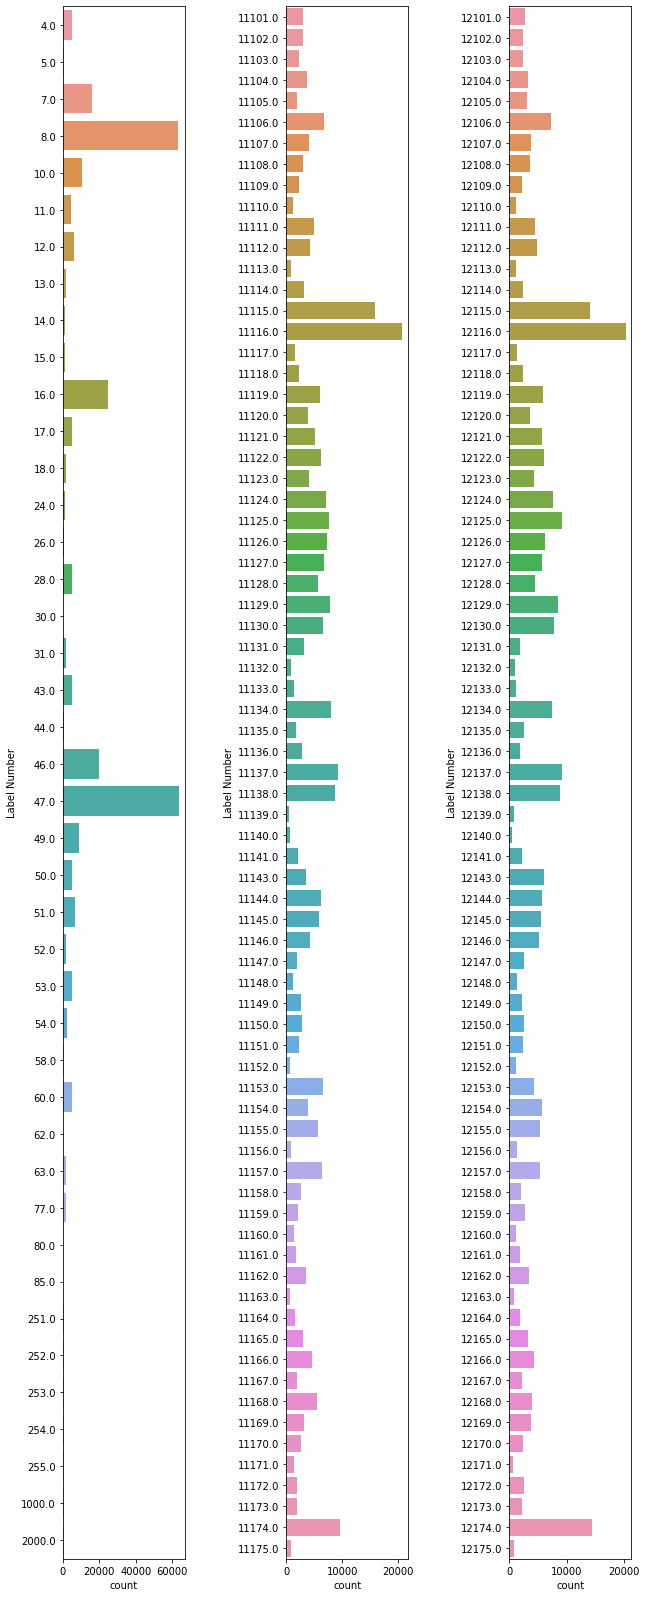

In [72]:
#figure out a way to plot/illustrate this better?
#drop the 0,41,2 values
labelsSubset=AtlasLabelsDataframe.loc[~AtlasLabelsDataframe.loc[:,0].isin([0,41,2])]
#reset the index
labelsSubset=labelsSubset.reset_index(drop=True)
#rename the column
labelsSubset=labelsSubset.rename(columns={0:"Label Number"})
#now split the values

lowerLabels=labelsSubset.loc[labelsSubset.iloc[:,0].le(10000)]
#reset the index
lowerLabels=lowerLabels.reset_index(drop=True)

midLabels=labelsSubset.loc[np.logical_and(~labelsSubset.iloc[:,0].le(10000),~labelsSubset.iloc[:,0].ge(12000))]
#reset the index
midLabels=midLabels.reset_index(drop=True)

upperLabels=labelsSubset.loc[labelsSubset.iloc[:,0].ge(12000)]
#reset the index
upperLabels=upperLabels.reset_index(drop=True)

#import seaborn and matplotlib for plotting
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1,ax2,ax3)=plt.subplots(1, 3)
fig.tight_layout(pad=3.0)
sns.countplot(y='Label Number',data=lowerLabels,ax=ax1)
#plt.gcf().set_size_inches(10,30)
#plt.figure(figsize=(10,30),dpi=200)

sns.countplot(y='Label Number',data=midLabels,ax=ax2)
#plt.gcf().set_size_inches(10,30)
#plt.figure(figsize=(10,30),dpi=200)

sns.countplot(y='Label Number',data=upperLabels,ax=ax3)
plt.gcf().set_size_inches(10,30)
#plt.figure(figsize=(10,30),dpi=200)

In the above histograms we get a sense of how many voxels (on the *count* axis) of the atlas correspond to each numerical label (on he *Label Number*' axis).  We see that some of these occur many thousands of times, while others occur quite a bit more infrequently.  Furthermore, you might also notice that the bottom two plots are roughly identical, this is because these two sets of numbers (11xyz and 12xyz) correspond to the left and right variants of the same structures in the current brain.  This is a standard feature of this particular freesurfer parcellation.  Lets consider the meaning of these numeric labels a bit more in depth.

Previously, when we were looking at the "paint-by-numbers" map of the united states, we noted that a parcellation is only really useful if we know the categories/framework the parcellations are mapping.  As it turns out the parcellation we are looking at here is very well documented, and the meaning of these labels is quite clear. Freesurfer's documentation includes a [listing of all possible label values](https://surfer.nmr.mgh.harvard.edu/fswiki/FsTutorial/AnatomicalROI/FreeSurferColorLUT).  Lets load this list up here and consider the names of the regions that we have labeled here.

In [73]:
#this code ensures that we can navigate the WiMSE repo across multiple systems
import subprocess
import os
#get top directory path of the current git repository, under the presumption that 
#the notebook was launched from within the repo directory
gitRepoPath=subprocess.check_output(['git', 'rev-parse', '--show-toplevel']).decode('ascii').strip()

#move to the top of the directory
os.chdir(gitRepoPath)

#establish path to table
FSTablePath=os.path.join(gitRepoPath,'FreesurferLookup.csv')

#read table using pandas
FSTable=pd.read_csv(FSTablePath)
#print the table interactively
itables.show(FSTable,columnDefs=[{"width": "10px", "targets": [0,2, 3, 4,5]}]) 

#No.,LabelName:,R,G,B,A


Here we see the list of possible label numbers (under **#No**), the the names of the anatomical regions they correspond to (under **LabelName**), and the internal color table assigned by Freesurfer (for plotting applications in FreeSurfer) under **R,G, & B**.  Although there are over 1,000 entries here, any given parcellation will only have have a subset of these.  This is because [this table](https://surfer.nmr.mgh.harvard.edu/fswiki/FsTutorial/AnatomicalROI/FreeSurferColorLUT)(taken from the freesurfer website) actually covers several, mutually exclusive, parcellation schemas.  In this way, two labels/numbers may correspond to overlapping areas of cortex (and thus the same constituent voxels of the associated T1 image).  For example, this would be the case with the label for the superior frontal gyrus from the Desikan-Killiany atlas[citation]--1028-- the superior frontal gyrus from the ["Destrieux" 2009 atlas](https://dx.doi.org/10.1016%2Fj.neuroimage.2010.06.010)--11116.  Note though, that in any given parcellation data object, any particular voxel could only be associated with *one* of these numbers/labels, and this would be determined by the parcellation schema (i.e. "ontology") that the parcellation data object was derived from. 

Lets limit our view of the table to consider only those labels that are present in our current nifti object *and* augment the table column or how many pixels correspond to that entry.

In [74]:
#create a boolean vector for the indexes which are in uniqueAtlasEntries
currentIndexesBool=FSTable['#No.'].isin(uniqueAtlasEntries)

#create new data frame with the relevant entries
currentParcellationEntries=FSTable.loc[currentIndexesBool]
#reset the indexes, whicj were disrupted by the previous operation
currentParcellationEntries=currentParcellationEntries.reset_index(drop=True)
#join the FS table subset with the voxel count
#note that we can drop the "Label Number" column of AtlasLabelCounts
#because the indexes of both dataframes track the label number
currentParcellationEntries=currentParcellationEntries.join(AtlasLabelCounts["voxel count"],how="left")

#display the table interactively
itables.show(currentParcellationEntries,columnDefs=[{"width": "10px", "targets": [2, 3, 4,5]}]) 

#No.,LabelName:,R,G,B,A,voxel count


There are several features to note about this specific parcellation schema, the ["Destrieux" 2009 atlas](https://dx.doi.org/10.1016%2Fj.neuroimage.2010.06.010):

- The "Unknown" entries are extremly numerous.  These constitute the background voxels--those for which no explicit anatomical mapping exists.  Thus even voxels without a direct mapping still have a numerical label attached to them.
- Numbers below 1000 (at least of the entries we see) correspond to sub-cortical structures
- Similarly, numbers above 10000 correspond to cortical structures
- 5 digit numbers that start with a 11 correspond to left hemisphere, while 5 digit numbers that start with a 12 correspond to the right hemisphere

These characteristics are not true of all parcellation schemas, but they do make a parcellation easier to work with.  Particularly, numerical regularities that indicate anatomical features (i.e. cortical vs. subcortical, left hemisphere vs right hemisphere, etc.) are of great use.

Now that we have taken a look our atlas's labels and their voxel counts, lets see how they are spatially laid out in the data volume.

In [75]:
from niwidgets import NiftiWidget

#in order to have visually distinguishable areas we have to renumber the labels in the data object
#this is because niwidgets scales the color map via the min and max values of the labeling scheme,
#rather than by unique values
relabeledAtlas=atlasData.copy()

#iterate across unique label entries
for iLabels in range(len(uniqueAtlasEntries)):
    #replace the current uniqueAtlasEntries value with the iLabels value
    #constitutes a simple renumbering schema
    relabeledAtlas[relabeledAtlas==uniqueAtlasEntries[iLabels]]=iLabels


#this code ensures that we can navigate the WiMSE repo across multiple systems
import subprocess
import os
#get top directory path of the current git repository, under the presumption that 
#the notebook was launched from within the repo directory
gitRepoPath=subprocess.check_output(['git', 'rev-parse', '--show-toplevel']).decode('ascii').strip()

#move to the top of the directory
os.chdir(gitRepoPath)

#establish path to new nifti file
newAtlasPath=os.path.join(gitRepoPath,'exampleData','renumberedAtlas.nii.gz')   

#store the modified atlas data in a nifti object
renumberedAtlasNifti=nib.Nifti1Image(relabeledAtlas, atlasImg.affine, atlasImg.header)  
#save the object down
nib.save(renumberedAtlasNifti, newAtlasPath)

#plot it
atlas_widget = NiftiWidget(newAtlasPath)
atlas_widget.nifti_plotter(colormap='nipy_spectral')

<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=127, continuous_update=False, description='x', max=255), IntSlider(value…

As you use the above sliders to move through the parcellation there are several things to take note of.  First and perhaps most striking,  while the saggital view may be appropriately labled, it is oriented in a somewhat disorienting fashion (typically we might expect this to be oriented such that the left and right axes of the plot correspond to the anterior-posterior axis of the brain).  The coronal and axial slices are switched, but even switching them back wouldn't be a complete solution, as the mislabeled axial slice appears to be upside down.  These observations combined suggest that the affine matrix is either incorrect or is being interpreted incorrectly.  We'll consider this issue a bit more in the next chapter when we briefly look at affines for nifti images.  For now though, we can consider some other features of the visualization.

Another feature of the visualization we can note is the qualatitive fashion which the parcellation actually "parcellates" (divides into pieces) the brain.  The vibrant, "color-by-numbers" image we're seeing above quite litteraly illustrates the distinct numerical entries in the NIfTI data object.  Just as in the digital image parcellation case, each data structure element can hold a single integer value, and can thus be associated with one, and *only* one, label, and by extension, color.  Multiple integers (and thus assignments) simply *won't* fit in the same data entry in the parcellation data structure.  

As a general note that is particular to brain parcellations, the anatomical entities represented in a parcellation will vary depending on what method and/or "ontology" (list of anatomical entities which are considered to "exist" for the purposes of a given parcellation) is applied.  For example, the brain regions represented in the parcellation presented above are derived from the ["Destrieux" 2009 atlas](https://dx.doi.org/10.1016%2Fj.neuroimage.2010.06.010).  The parcelled regions in this atlas (and the majority of other brain atlases, for that matter) correspond to brain regions which exhibit structural, functional, and/or microstructural homogenities relative to their neighboring brain regions.

Now that we have explored three dimensional parcellations a bit, lets move on to a consideration of affine transforms and how they can be used to align parcellations with raw data.